# Exercises 
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.
- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

## null hypotheses
- no it has be the same
- yes the redesign is fine, there is no difference
- no it is pulling the same amount of viewers

## alternative hypotheses
- there is a different latency then the last provider (more or less)
- there is a changed amount of users on the website (more or less)
- the ad is now pulling more customers, or getting less engagment

## true positive
- there is an decrease in latency after switch to new provider
- the website redesign was good, greater overall customer interaction
- the television ad is successfully bringing in more sales

## type 1 error
- the internet feels faster when in reality not
- the website initially had a gain then fell back down to the median
- sales have increased but when surveyed the customers did not list the ad as seen

## true negative
- there is no difference is latency or speed
- the website is too complicated
- the television ad doesn't bring in more attention or money

## type 2 error
- when testing the internet speed there is no difference but internet can now stream hd
- cannot tell on the website but revenew is returning higher
- the add is not referenced in purchase, purchases are increasing

# T-test Exercises
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
import numpy as  np
# import env
import scipy
from math import sqrt

In [3]:
stats.binom(618, .1).sf(70)

0.12281969339878751

luckily there is  the first question to answer
- Office 1
- - 40 sales T/ mean of 90 days P/ 15 day std A
- Office 2
- - 50 sales T/ mean of 100 days P/ 20 day std A
- significance .05

In [ ]:
mean1=90
sdev1=15
nobs1=40
mean2=100
sdev2=20
nobs2=50

t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, nobs1, 
                                        mean2, sdev2, nobs2,
                                        equal_var = False)

In [ ]:
t

In [ ]:
p

In [ ]:
# α = 0.05

# tstat, pval = scipy.stats.ttest_ind(equal_var = False)

# t, p , α

- Load the mpg dataset and use it to answer the following questions:
- - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- - Are compact cars more fuel-efficient than the average car?
- - Do manual cars get better gas mileage than automatic cars?

In [22]:
df = data('mpg')
df.head(100)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [ ]:
df.info()

Only cars from either 1999 or 2008 exist on this list

In [ ]:
df.year.unique()

In [ ]:
df[df.year == 1999]

In [ ]:
df[df.year == 1999].count()

In [ ]:
df[df.year== 2008].count()

In [ ]:
df[df.year == 1999].hwy.mean()

In [ ]:
df[df.year == 1999].cty.mean()

In [ ]:
df[df.year == 1999].hwy.mean() + df[df.year == 1999].cty.mean() /2
#1999 average for 1999 mpg + hwy

In [ ]:
df[df.year== 2008].hwy.mean()

In [ ]:
df[df.year== 2008].cty.mean()

In [ ]:
df[df.year == 2008].hwy.mean() + df[df.year == 2008].cty.mean() /2
#2008 average city and highway mpg

In [ ]:
df.head()

In [ ]:
df[df["class"] == "compact"]

In [ ]:
df[df['class'] == "compact"].cty.mean()
#df[df.class == "compact"].hwy.mean() / 2

In [ ]:
df[df['class'] == "compact"].hwy.mean()

In [ ]:
df[df['class'] == "compact"].cty.mean() + df[df['class'] == "compact"].hwy.mean() / 2

In [ ]:
df[df['class'] == "compact"].cty.mean()

In [ ]:
#H_0: Average time to sell at office 1 == average time to sell  at office 1
#H_a: Average time to sell at office 1 != average time to sell  at office 2

In [ ]:
alpha = 0.05

In [ ]:
# visualize distributions

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.plot(x, y1 , label = "Office")
plt.plot(x, y2, label = "Office 2")
plt.avxline(90, ls='t')
plt.avxline(100, ls=':', color = 'orange')

plt.legend()

In [ ]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50,equal_var=False)
t, p

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
    

In [ ]:
mpg = data('mpg')

In [ ]:
mpg.head()

In [ ]:
#H_0: There is no difference in fuel efficiency in cars from 2008 & 1999
#H_a: There is a diffrence in cars

In [ ]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis =1)
mpg.head()

In [ ]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [ ]:
fe_2008.hist()

In [ ]:
fe_1999.hist()

In [ ]:
fe_2008.count()

In [ ]:
fe_1999.count() # normality not issue

In [ ]:
#what about variance
fe_2008.var(), fe_1999.var()

In [ ]:
# Levens test
stats.levene(fe_2008, fe_1999)

In [ ]:
#calculate t & p
t, p = stats.ttest_ind(fe_2008,fe_1999)
t, p

In [ ]:
if p < alpha:
    print('reject null')
else:
    print('fail to reject null')

In [ ]:
fe_2008.mean(), fe_1999.mean()

In [ ]:
plt.hist([fe_1999, fe_2008], label=["1999 cars",'2008 cars'])

In [ ]:
#H_0: MPG for compact cars <= mpg for the average car
#H_a: MPG for compact cars > mpg for the average car

In [ ]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [ ]:
pop_mean

In [ ]:
fe_compact.mean()

In [ ]:
fe_compact.hist()

In [ ]:
#calculate t & p
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

In [ ]:
if (p/2 < alpha) and t > 0 :
    print('Reject null')

In [ ]:
mpg.head()

In [ ]:
mpg.trans.value_counts()

In [ ]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [ ]:
fe_auto.hist()

In [ ]:
fe_manual.hist()

In [ ]:
# llok at variance
fe_auto.var(), fe_manual.var()

In [ ]:
#levene test
stats.levene(fe_auto, fe_manual)

In [ ]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

In [ ]:
fe_manual.mean(), fe_auto.mean()

In [ ]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Tranmission')

# Correlation Exercises



    Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?
    Use the employees database.
        Is there a relationship between how long an employee has been with the company and their salary?
        Is there a relationship between how long an employee has been with the company and the number of titles they have had?
    Use the sleepstudy data. Is there a relationship between days and reaction time?


In [3]:
import telco.csv
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

ModuleNotFoundError: No module named 'telco'

In [19]:
import env
# url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

In [20]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

In [21]:
df = pd.read_sql(
    'select * from customers join internet_service_types using (internet_service_type_id)',
    url
)
df = df[['tenure', 'monthly_charges', 'total_charges', 'internet_service_type', 'phone_service']]

In [22]:
df

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
0,9,65.60,593.3,DSL,Yes
1,9,59.90,542.4,DSL,Yes
2,4,73.90,280.85,Fiber optic,Yes
3,13,98.00,1237.85,Fiber optic,Yes
4,3,83.90,267.4,Fiber optic,Yes
...,...,...,...,...,...
7038,13,55.15,742.9,DSL,Yes
7039,22,85.10,1873.7,Fiber optic,Yes
7040,2,50.30,92.75,DSL,Yes
7041,67,67.85,4627.65,DSL,Yes


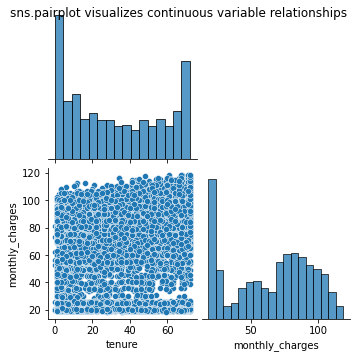

In [23]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()
#thank the lord the ciriculumn covered the question

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tenure                 7043 non-null   int64  
 1   monthly_charges        7043 non-null   float64
 2   total_charges          7043 non-null   object 
 3   internet_service_type  7043 non-null   object 
 4   phone_service          7043 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 275.2+ KB


In [25]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)
df.total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [26]:
df.isna().mean()

tenure                   0.000000
monthly_charges          0.000000
total_charges            0.001562
internet_service_type    0.000000
phone_service            0.000000
dtype: float64

In [27]:
df.shape[0]

7043

## Calculate Pearson Correlation Coefficient

In [28]:
n = df.shape[0]
x = df.total_charges
y = df.tenure

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.8247573156351038

In [29]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

122.38292909934457

In [30]:
stats.pearsonr(df.tenure, df.monthly_charges)

(0.24789985628615002, 4.0940449915016345e-99)

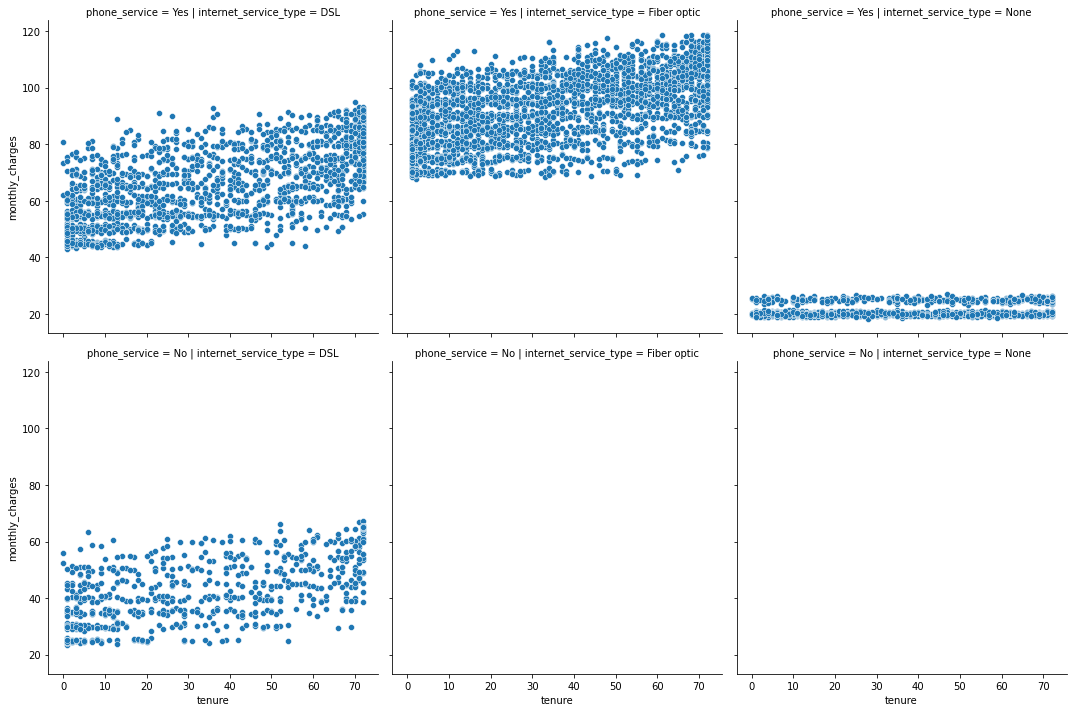

In [31]:
sns.relplot(data=df, y='monthly_charges', 
            x='tenure', 
            col='internet_service_type', 
            row='phone_service')

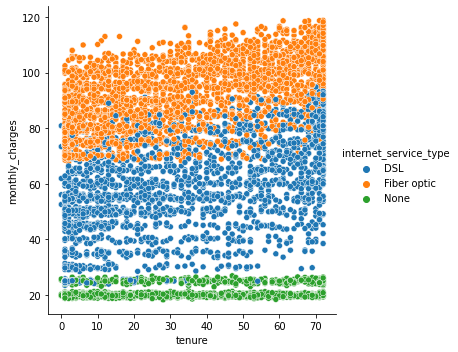

In [34]:
sns.relplot(data=df, y='monthly_charges', 
            x='tenure', 
            hue='internet_service_type')
#what not to do

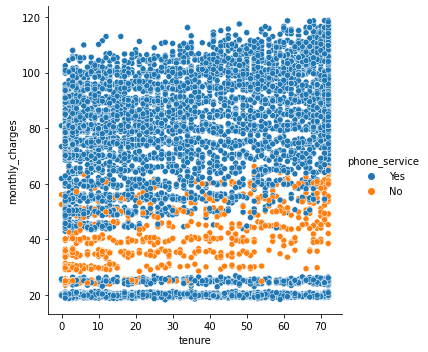

In [35]:
sns.relplot(data=df, y='monthly_charges', 
            x='tenure', 
            hue='phone_service')

In [38]:
def correlate_tenure_and_monthly_charges(df):
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index=['r', 'p'])

df.groupby(['internet_service_type', 'phone_service']).apply(correlate_tenure_and_monthly_charges)

r              p
internet_service_type phone_service                         
DSL                   No             0.585760   4.603370e-64
                      Yes            0.655385  5.676203e-214
Fiber optic           Yes            0.624621   0.000000e+00
None                  Yes            0.342326   3.356187e-43

In [40]:
df.groupby(['internet_service_type', 'phone_service']).apply(correlate_tenure_and_monthly_charges)

r              p
internet_service_type phone_service                         
DSL                   No             0.585760   4.603370e-64
                      Yes            0.655385  5.676203e-214
Fiber optic           Yes            0.624621   0.000000e+00
None                  Yes            0.342326   3.356187e-43

In [41]:
stats.pearsonr(df.tenure, df.total_charges)

ValueError: array must not contain infs or NaNs

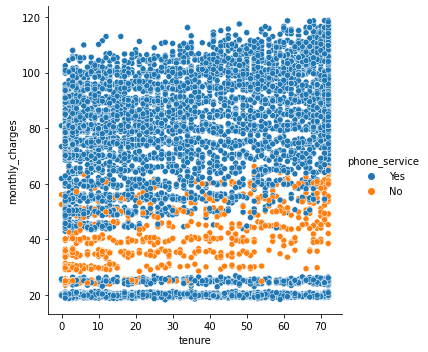

In [36]:
sns.relplot(data=df, y='monthly_charges', 
            x='tenure', 
            hue='phone_service')

In [6]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

query = '''

 SELECT
     DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
     s.salary AS salary
 FROM employees e
 JOIN salaries s USING (emp_no)
 WHERE s.to_date > NOW()
 '''

employees_with_salaries = pd.read_sql(query,url)

In [7]:
employees_with_salaries.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


In [9]:
employees_with_salaries.shape

(240124, 2)

In [11]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

(0.30646256131860783, 0.0)

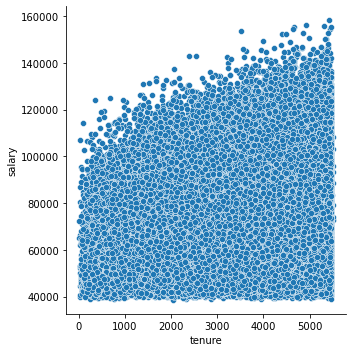

In [13]:
sns.relplot(data=employees_with_salaries, y='salary', x='tenure')

In [16]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [42]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


# Chi Square Exercises
1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


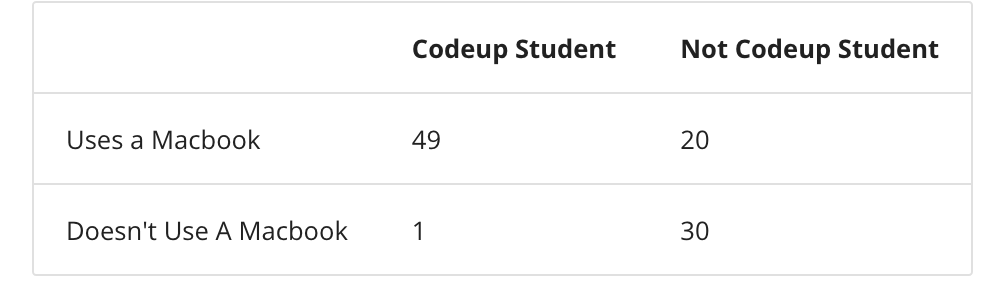

3. Use the data from the employees database to answer these questions: 
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [1]:
# It seems from here it would be helpful to set some hypotheses.
# H_0: There is no correlation from using a Macbook and being a Codeup student
# H_a: There is a relation between owning a Mac and being a Codeup student
#type_I error (false-positive): 

In [2]:
#First we need a dataframe to make our lives easier, I had forgotten how but found what I needed
# observed = pd.DataFrame(
#     {
#         'codeup_student': [49,1],
#         'not_student': [20,30]
#     }, index=['macbook_user', 'not_macbook']
# )

In [8]:
observed = pd.DataFrame(
    {
        'Codeup Student':[49,1],
        'Not Codeup Student':[20,30]
    }, index=['Uses a Macbook', "Doesn't Use A Macbook"]
)
observed
#now that I have successfully plotted my information as a DataFrame

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [9]:
confidence_level = 0.95
alpha = 1 - confidence_level
#α here is .05 like usual

In [13]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2

36.65264142122487

In [14]:
p
#reject the null hypothesis which is that there is no relation

1.4116760526193828e-09

In [16]:
degf

1

In [18]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

In [20]:
print('Observed:\n:')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
if p < alpha:
    print('Our p value is less than our alpha and we can reject the null hypothesis, indicating that macbook use is not necessarily independent of codeup matriculation')
else:
    print('We cannot reject the null hypothesis')

Observed:
:
                       Codeup Student  Not Codeup Student
Uses a Macbook                     49                  20
Doesn't Use A Macbook               1                  30
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

                       Codeup Student  Not Codeup Student
Uses a Macbook                   34.5                34.5
Doesn't Use A Macbook            15.5                15.5
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 36.6526
p value: 0.00000000
Our p value is less than our alpha and we can reject the null hypothesis, indicating that macbook use is not necessarily independent of codeup matriculation


2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [28]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


My hypothesis is that different manufacturers have different highway gas mileage
- as it turns out this is not a format of information that illicit's a chi squared test

### new hypothesis 
- the model name is dependent on the manufacturer
- H_0: null hypothesis is that there is no relation to each other, they are independent variables
- H-a: there is a connection between manufacturer and transmission

In [31]:
mpg.nunique()
#this narrows

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [43]:
pd.crosstab(mpg.manufacturer, mpg.hwy.sum())
#this is odd there are cars with 3 miles to the gallon on the highway?
#this data is telling me all of the the enteries that exist in a company
#what I now need is the average highway mileage by each manufacturer

col_0,23.440171
manufacturer,
audi,18
chevrolet,19
dodge,37
ford,25
honda,9
hyundai,14
jeep,8
land rover,4
lincoln,3


In [54]:
# mpg.manufacturer.lincoln

In [51]:
mpg[mpg.manufacturer == 'lincoln']
# mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
135,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
136,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,16,p,suv
137,lincoln,navigator 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv


In [52]:
mpg.manufacturer.nunique

<bound method IndexOpsMixin.nunique of 1            audi
2            audi
3            audi
4            audi
5            audi
          ...    
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
234    volkswagen
Name: manufacturer, Length: 234, dtype: object>

In [53]:
# I just asked Ryan if we can make averages as categories but alas we cannot
# bins are bins, they are not categories
# not at least for a chi2 test

In [58]:
observed = pd.crosstab(mpg.manufacturer, mpg.trans)
observed

trans,auto(av),auto(l3),auto(l4),auto(l5),auto(l6),auto(s4),auto(s5),auto(s6),manual(m5),manual(m6)
manufacturer,,,,,,,,,,
audi,2,0,0,5,0,0,0,4,4,3
chevrolet,0,0,14,0,0,0,0,2,0,3
dodge,0,1,16,11,2,0,0,0,3,4
ford,0,0,10,5,2,0,0,0,7,1
honda,0,0,2,2,0,0,0,0,4,1
hyundai,0,0,6,1,0,0,0,0,6,1
jeep,0,0,2,6,0,0,0,0,0,0
land rover,0,0,2,0,0,0,0,2,0,0
lincoln,0,0,2,0,1,0,0,0,0,0


In [68]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [63]:
chi2

246.9190857019707

In [72]:
p

7.163203875453806e-10

In [ ]:
p < alpha

In [66]:
degf

126

In [70]:
expected

array([[ 0.38461538,  0.15384615,  6.38461538,  3.        ,  0.46153846,
         0.23076923,  0.23076923,  1.23076923,  4.46153846,  1.46153846],
       [ 0.40598291,  0.16239316,  6.73931624,  3.16666667,  0.48717949,
         0.24358974,  0.24358974,  1.2991453 ,  4.70940171,  1.54273504],
       [ 0.79059829,  0.31623932, 13.12393162,  6.16666667,  0.94871795,
         0.47435897,  0.47435897,  2.52991453,  9.17094017,  3.0042735 ],
       [ 0.53418803,  0.21367521,  8.86752137,  4.16666667,  0.64102564,
         0.32051282,  0.32051282,  1.70940171,  6.1965812 ,  2.02991453],
       [ 0.19230769,  0.07692308,  3.19230769,  1.5       ,  0.23076923,
         0.11538462,  0.11538462,  0.61538462,  2.23076923,  0.73076923],
       [ 0.2991453 ,  0.11965812,  4.96581197,  2.33333333,  0.35897436,
         0.17948718,  0.17948718,  0.95726496,  3.47008547,  1.13675214],
       [ 0.17094017,  0.06837607,  2.83760684,  1.33333333,  0.20512821,
         0.1025641 ,  0.1025641 ,  0.54700855

In [75]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that vehicle trans type if not independent of manufacturer''')
else:
    print('We cannot reject the null hypothesis')

Observed:

trans         auto(av)  auto(l3)  auto(l4)  auto(l5)  auto(l6)  auto(s4)  \
manufacturer                                                               
audi                 2         0         0         5         0         0   
chevrolet            0         0        14         0         0         0   
dodge                0         1        16        11         2         0   
ford                 0         0        10         5         2         0   
honda                0         0         2         2         0         0   
hyundai              0         0         6         1         0         0   
jeep                 0         0         2         6         0         0   
land rover           0         0         2         0         0         0   
lincoln              0         0         2         0         1         0   
mercury              0         0         1         2         1         0   
nissan               3         0         3         1         0         0   
p